In [29]:
import numpy as np
import pandas as pd
import umap
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pandas.api.types import is_numeric_dtype

#UMAP_function

def plot_umap(X, y, ax, **kwargs):

    y = pd.Series(y) if not isinstance(y, pd.Series) else y
    #Data Type
    if is_numeric_dtype(y) and y.nunique() > 10 :
        continuous = True
    
    else:
        continuous = False

    reducer = umap.UMAP()
    embedding = reducer.fit_transform(X)

    plt.sca(ax)

    #color bar
    if continuous:
        sc = ax.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='viridis', s=kwargs.get('s',50),alpha=0.7)
        colorbar = plt.colorbar(sc, ax=ax)
        colorbar.set_label('Continuous value')

    #legend
    else:
        unique_classes = np.unique(y)
        for i, cls in enumerate(unique_classes):
            ax.scatter(embedding[y == cls, 0], embedding[y == cls, 1], label = f"Class{cls}", s=kwargs.get('s',50),alpha=0.7)
        ax.legend(title="Classes", loc="best", fontsize=10)



    if 'set_title' in kwargs.keys():
        ax.set_title(kwargs['set_title']["label"])
    
    if 'set_xlabel' in kwargs.keys():
        ax.set_xlabel(kwargs['set_xlabel'])

    if 'set_ylabel' in kwargs.keys():
        ax.set_label(kwargs['set_ylabel'])

    if 'set_xlim' in kwargs.keys():
        ax.set_xlim(kwargs['set_xlim'])
        
    if 'set_xticks' in kwargs.keys():
        ax.set_xticks(kwargs['set_xticks'])
        
    if 'tick_params' in kwargs.keys():
        ax.tick_params(**kwargs['tick_params'])

    
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    
    #ax.legend(title="Classes", loc="best", fontsize=10)

    

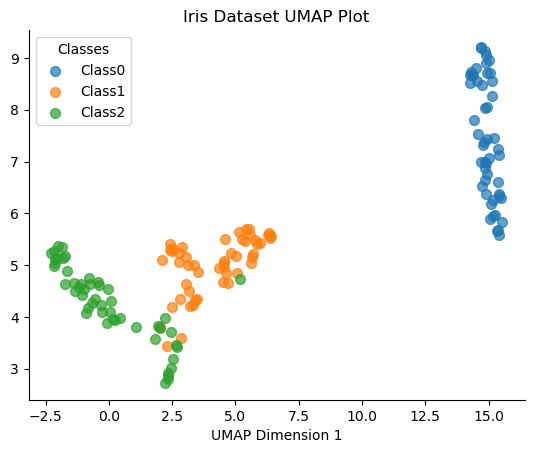

In [30]:
#function example
iris = load_iris()
X = iris.data
y= iris.target


fig, ax = plt.subplots()
plot_umap(
    X, 
    y, 
    ax, 
    s=50, 
    set_title={'label': 'Iris Dataset UMAP Plot'}, 
    set_xlabel='UMAP Dimension 1',
    set_ylabel= 'UMAP Dimension 2' 
    )
plt.show()